# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import tensorflow as tf
import sklearn
import joblib

<center><H1> DATA PRE-PROCESSING </H1></center>

## LOADING OF DATASET

In [2]:
data = pd.read_csv('marketing_campaign.csv',delimiter='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntDrinks,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Dropping Unnecessary Columns

In [3]:
data = data.drop(columns = ['Dt_Customer','Recency','Complain','NumDealsPurchases','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Z_CostContact','Z_Revenue'])
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntDrinks,MntFruits_and_veg,MntNon_veg_Products,MntGroceries,MntSweetProducts,MntSnacks,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2
0,5524,1957,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,8,10,4,7,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,11,1,6,2,1,6,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,426,49,127,111,21,42,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,11,4,20,10,3,5,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,173,43,118,46,27,15,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,709,43,182,42,118,247,9,3,4,5,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,406,0,30,0,0,8,8,2,5,7,1,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,908,48,217,32,12,24,2,3,13,6,0,0
2238,8235,1956,Master,Together,69245.0,0,1,428,30,214,80,30,61,6,5,10,3,0,0


## Explanation of Column

#### People:
<ul>
    <li><b>ID</b>: Customer's unique identifier</li>
    <li><b>Year_Birth</b>: Customer's birth year</li>
    <li><b>Education</b>: Customer's education level</li>
    <li><b>Marital_Status</b>: Customer's marital status</li>
    <li><b>Income</b>: Customer's yearly household income</li>
    <li><b>Kidhome</b>: Number of children in customer's household</li>
    <li><b>Teenhome</b>: Number of teenagers in customer's household</li>
</ul>

#### Products:
<ul>
    <li><b>MntDrinks</b>: Amount spent on Drink in last 2 years</li>
    <li><b>MntFruits_and_veg</b>: Amount spent on fruits and vegetables in last 2 years</li>
    <li><b>MntNon_veg_Products</b>: Amount spent on non-veg Products in last 2 years</li>
    <li><b>MntGroceries</b>: Amount spent on Groceries in last 2 years</li>
    <li><b>MntSweetProducts</b>: Amount spent on sweets in last 2 years</li>
    <li><b>MntSnacks</b>: Amount spent on Snacks in last 2 years</li>
</ul>
    
#### Misc
<ul>
    <li><b>NumWebPurchases</b>: Number of purchases made through the company’s website</li>
    <li><b>NumCatalogPurchases</b>: Number of purchases made using a catalogue</li>
    <li><b>NumStorePurchases</b>: Number of purchases made directly in stores</li>
    <li><b>NumWebVisitsMonth</b>: Number of visits to company’s website in the last month</li>
</ul>

#### Promotion
<ul>
    <li><b>AcceptedCmp1</b>: 1 if customer accepted the offer in the 1st campaign, 0 otherwise</li>
    <li><b>AcceptedCmp2</b>: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise</li>
</ul>


In [4]:
data.shape

(2240, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   MntDrinks            2240 non-null   int64  
 8   MntFruits_and_veg    2240 non-null   int64  
 9   MntNon_veg_Products  2240 non-null   int64  
 10  MntGroceries         2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntSnacks            2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [6]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,MntDrinks,MntFruits_and_veg,MntNon_veg_Products,MntGroceries,MntSweetProducts,MntSnacks,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,4.084821,2.662054,5.790179,5.316518,0.064286,0.013393
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,2.778714,2.923101,3.250958,2.426645,0.245316,0.114976
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


## Checking for Missing Values

In [7]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
MntDrinks               0
MntFruits_and_veg       0
MntNon_veg_Products     0
MntGroceries            0
MntSweetProducts        0
MntSnacks               0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
dtype: int64

In [8]:
mean_value=round(data['Income'].mean(),1)
mean_value

52247.3

In [9]:
data['Income'] = data['Income'].fillna(mean_value)
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
MntDrinks              0
MntFruits_and_veg      0
MntNon_veg_Products    0
MntGroceries           0
MntSweetProducts       0
MntSnacks              0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
dtype: int64

## Checking for Duplicated Values

In [10]:
data.duplicated().sum()

0

## Dealing with Outliers

In [11]:
outlier_columns = ['Year_Birth','Income','MntDrinks','MntFruits_and_veg','MntNon_veg_Products','MntGroceries','MntSweetProducts','MntSnacks','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

C:\Users\Suprit Naik\AppData\Local\Temp\ipykernel_29104\1192248636.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[outlier_columns[i]], ax=ax[i // 3, i % 3])
C:\Users\Suprit Naik\AppData\Local\Temp\ipykernel_29104\1192248636.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[outli

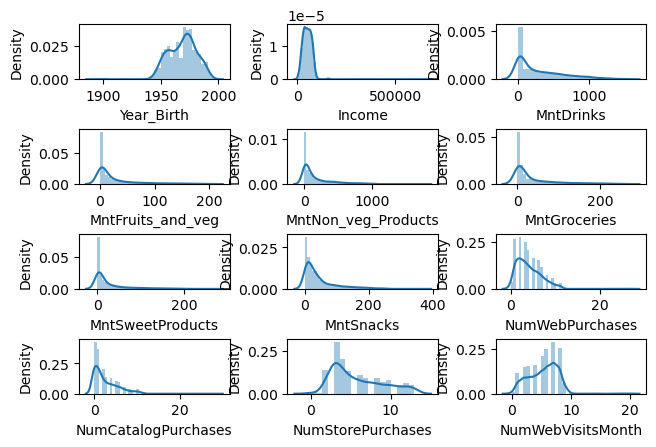

In [12]:
fig, ax = plt.subplots(4, 3)
fig.tight_layout(h_pad=2)

# Plot on specified subplots
for i in range(len(outlier_columns)):
    sns.distplot(data[outlier_columns[i]], ax=ax[i // 3, i % 3])

#define subplot xlabel
for i in range(len(outlier_columns)):
    ax[i // 3, i % 3].set_xlabel(outlier_columns[i])

plt.subplots_adjust(top=0.85)

#display the plots 
plt.show()

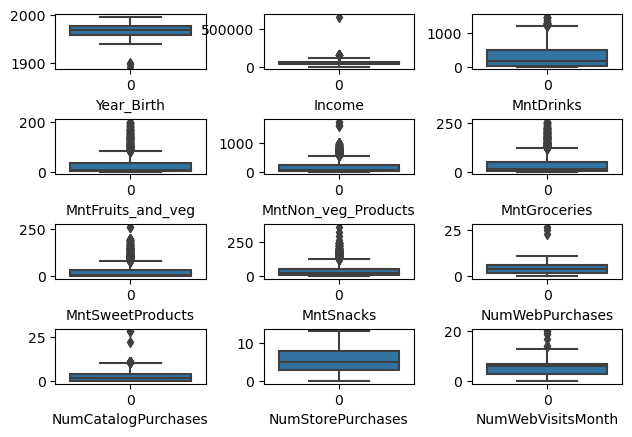

In [13]:
fig, ax = plt.subplots(4, 3)
fig.tight_layout(h_pad=2)

# Plot on specified subplots
for i in range(len(outlier_columns)):
    sns.boxplot(data[outlier_columns[i]], ax=ax[i // 3, i % 3])

#define subplot xlabel
for i in range(len(outlier_columns)):
    ax[i // 3, i % 3].set_xlabel(outlier_columns[i])

plt.subplots_adjust(top=0.85)

#display the plots 
plt.show()

In [14]:
outlier_columns = ['Year_Birth','Income','MntDrinks','MntFruits_and_veg','MntNon_veg_Products','MntGroceries','MntSweetProducts','MntSnacks','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
for column in outlier_columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    minimum_value = int(q1-1.5*iqr)
    maximum_value = int(q3+1.5*iqr)

    print(column)
    print("Minimum Value = ",minimum_value);
    print("Maximum Value = ",maximum_value);
    #Capping
    data[column] = np.where(data[column]>maximum_value,maximum_value,
                                    np.where(data[column]<minimum_value,minimum_value,
                                  data[column]))
    data[column] = data[column].astype('int64')
    print()

Year_Birth
Minimum Value =  1932
Maximum Value =  2004

Income
Minimum Value =  -13587
Maximum Value =  117416

MntDrinks
Minimum Value =  -697
Maximum Value =  1225

MntFruits_and_veg
Minimum Value =  -47
Maximum Value =  81

MntNon_veg_Products
Minimum Value =  -308
Maximum Value =  556

MntGroceries
Minimum Value =  -67
Maximum Value =  120

MntSweetProducts
Minimum Value =  -47
Maximum Value =  81

MntSnacks
Minimum Value =  -61
Maximum Value =  126

NumWebPurchases
Minimum Value =  -4
Maximum Value =  12

NumCatalogPurchases
Minimum Value =  -6
Maximum Value =  10

NumStorePurchases
Minimum Value =  -4
Maximum Value =  15

NumWebVisitsMonth
Minimum Value =  -3
Maximum Value =  13



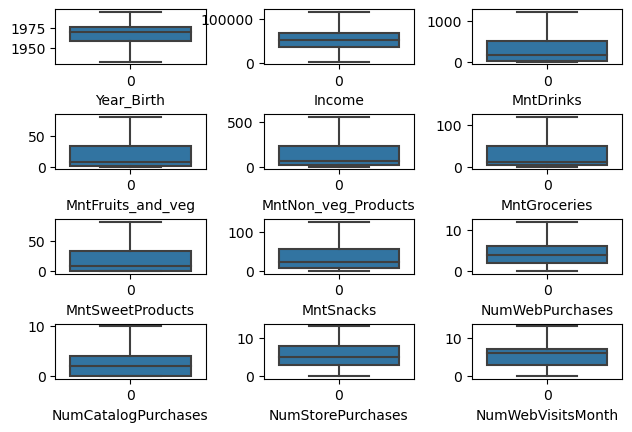

In [15]:
fig, ax = plt.subplots(4, 3)
fig.tight_layout(h_pad=2)

# Plot on specified subplots
for i in range(len(outlier_columns)):
    sns.boxplot(data[outlier_columns[i]], ax=ax[i // 3, i % 3])

#define subplot xlabel
for i in range(len(outlier_columns)):
    ax[i // 3, i % 3].set_xlabel(outlier_columns[i])

plt.subplots_adjust(top=0.85)

#display the plots 
plt.show()

## Dealing with Categorical Values

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int64 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   MntDrinks            2240 non-null   int64 
 8   MntFruits_and_veg    2240 non-null   int64 
 9   MntNon_veg_Products  2240 non-null   int64 
 10  MntGroceries         2240 non-null   int64 
 11  MntSweetProducts     2240 non-null   int64 
 12  MntSnacks            2240 non-null   int64 
 13  NumWebPurchases      2240 non-null   int64 
 14  NumCatalogPurchases  2240 non-null   int64 
 15  NumStorePurchases    2240 non-null   int64 
 16  NumWeb

In [17]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntDrinks,MntFruits_and_veg,MntNon_veg_Products,MntGroceries,MntSweetProducts,MntSnacks,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2
0,5524,1957,Graduation,Single,58138,0,0,635,81,546,120,81,88,8,10,4,7,0,0
1,2174,1954,Graduation,Single,46344,1,1,11,1,6,2,1,6,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613,0,0,426,49,127,111,21,42,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646,1,0,11,4,20,10,3,5,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293,1,0,173,43,118,46,27,15,5,3,6,5,0,0


In [18]:
education_column = data['Education'].sort_values().unique()
education_column

array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object)

In [19]:
for i in range(len(education_column)):
    data['Education']=np.where(data['Education']==education_column[i],i,data['Education'])
data['Education'] = data['Education'].astype('int64')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntDrinks,MntFruits_and_veg,MntNon_veg_Products,MntGroceries,MntSweetProducts,MntSnacks,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2
0,5524,1957,2,Single,58138,0,0,635,81,546,120,81,88,8,10,4,7,0,0
1,2174,1954,2,Single,46344,1,1,11,1,6,2,1,6,1,1,2,5,0,0
2,4141,1965,2,Together,71613,0,0,426,49,127,111,21,42,8,2,10,4,0,0
3,6182,1984,2,Together,26646,1,0,11,4,20,10,3,5,2,0,4,6,0,0
4,5324,1981,4,Married,58293,1,0,173,43,118,46,27,15,5,3,6,5,0,0


In [20]:
data['Marital_Status'].sort_values().unique()

array(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together',
       'Widow', 'YOLO'], dtype=object)

In [21]:
#Forming into distinctive Category
data['Marital_Status'] = data['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')
data['Marital_Status'] = data['Marital_Status'].replace(['Together', 'Married'], 'Couple')
data['Marital_Status'].sort_values().unique()

array(['Couple', 'Divorced', 'Single', 'Widow'], dtype=object)

In [22]:
marital_column = ['Single','Couple','Divorced','Widow']
for i in range(len(marital_column)):
    data['Marital_Status']=np.where(data['Marital_Status']==marital_column[i],i,data['Marital_Status'])
data['Marital_Status'] = data['Marital_Status'].astype('int64')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntDrinks,MntFruits_and_veg,MntNon_veg_Products,MntGroceries,MntSweetProducts,MntSnacks,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2
0,5524,1957,2,0,58138,0,0,635,81,546,120,81,88,8,10,4,7,0,0
1,2174,1954,2,0,46344,1,1,11,1,6,2,1,6,1,1,2,5,0,0
2,4141,1965,2,1,71613,0,0,426,49,127,111,21,42,8,2,10,4,0,0
3,6182,1984,2,1,26646,1,0,11,4,20,10,3,5,2,0,4,6,0,0
4,5324,1981,4,1,58293,1,0,173,43,118,46,27,15,5,3,6,5,0,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   2240 non-null   int64
 1   Year_Birth           2240 non-null   int64
 2   Education            2240 non-null   int64
 3   Marital_Status       2240 non-null   int64
 4   Income               2240 non-null   int64
 5   Kidhome              2240 non-null   int64
 6   Teenhome             2240 non-null   int64
 7   MntDrinks            2240 non-null   int64
 8   MntFruits_and_veg    2240 non-null   int64
 9   MntNon_veg_Products  2240 non-null   int64
 10  MntGroceries         2240 non-null   int64
 11  MntSweetProducts     2240 non-null   int64
 12  MntSnacks            2240 non-null   int64
 13  NumWebPurchases      2240 non-null   int64
 14  NumCatalogPurchases  2240 non-null   int64
 15  NumStorePurchases    2240 non-null   int64
 16  NumWebVisitsMonth    224

## Splitting of Data

In [24]:
X = data.iloc[:, 1:7].values


In [25]:
y_drink = data.iloc[:, 7].values
y_drink


array([635,  11, 426, ..., 908, 428,  84], dtype=int64)

In [26]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_drink_train, y_drink_test = train_test_split(X, y_drink, test_size = 0.2, random_state = 0)

In [27]:
y_fruit_veg = data.iloc[:, 8].values
y_non_veg = data.iloc[:, 9].values
y_groceries = data.iloc[:, 10].values
y_sweet = data.iloc[:, 11].values
y_snacks = data.iloc[:, 12].values
y_web_purchase = data.iloc[:, 13].values
y_catalogue = data.iloc[:, 14].values
y_store = data.iloc[:, 15].values
y_web_visit = data.iloc[:, 16].values
y_accept_cmp1 = data.iloc[:, 17].values
y_accept_cmp2 = data.iloc[:, 18].values

In [28]:
y_fruit_veg_train, y_fruit_veg_test, y_non_veg_train, y_non_veg_test = train_test_split(y_fruit_veg, y_non_veg, test_size = 0.2, random_state = 0)

In [29]:
y_groceries_train, y_groceries_test, y_sweet_train, y_sweet_test = train_test_split(y_groceries, y_sweet, test_size = 0.2, random_state = 0)

In [30]:
y_snacks_train, y_snacks_test, y_web_purchase_train, y_web_purchase_test = train_test_split(y_snacks, y_web_purchase, test_size = 0.2, random_state = 0)

In [31]:
y_catalogue_train, y_catalogue_test, y_store_train, y_store_test = train_test_split(y_catalogue, y_store, test_size = 0.2, random_state = 0)

In [32]:
y_web_visit_train, y_web_visit_test, y_accept_cmp1_train, y_accept_cmp1_test = train_test_split(y_web_visit, y_accept_cmp1, test_size = 0.2, random_state = 0)

In [33]:
y_accept_cmp2_train, y_accept_cmp2_test = train_test_split(y_accept_cmp2, test_size = 0.2, random_state = 0)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Training

In [35]:
from sklearn.tree import DecisionTreeRegressor
regressor_t = DecisionTreeRegressor(random_state = 0)

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

#### DRINK

In [37]:
regressor_t.fit(X_train, y_drink_train)
y_tree = regressor_t.predict(X_test)

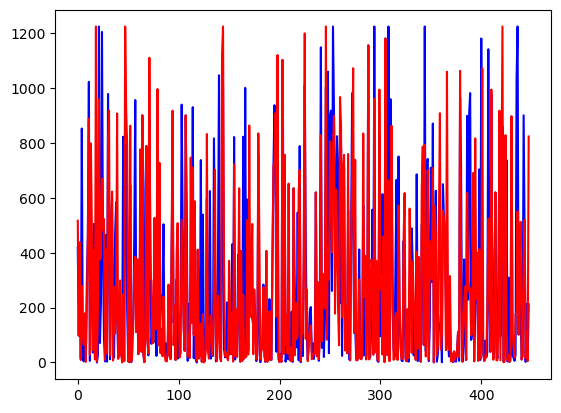

In [38]:
plt.plot(y_drink_test,color = 'blue')
plt.plot(y_tree, color='red')

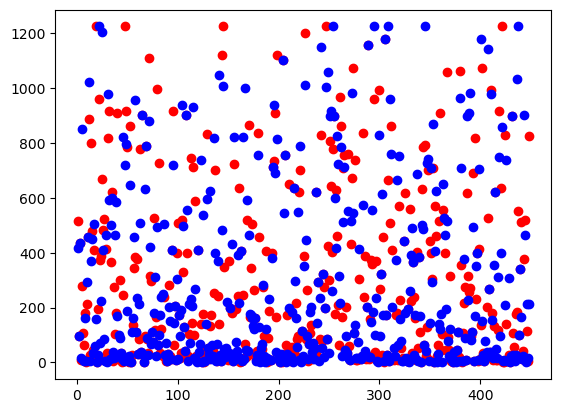

In [39]:
x = np.arange(1,449)
plt.scatter(x,y_tree,color='red')
plt.scatter(x,y_drink_test,color='blue')
plt.show()


In [40]:
joblib.dump(regressor_t, 'model_drinks.joblib')

['model_drinks.joblib']

#### FRUIT AND VEGETABLE


In [41]:
regressor_t.fit(X_train, y_fruit_veg_train)
y_fruit_veg = regressor_t.predict(X_test)

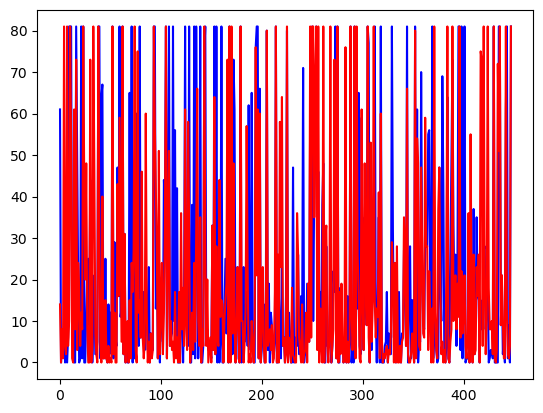

In [42]:
plt.plot(y_fruit_veg_test,color = 'blue')
plt.plot(y_fruit_veg, color='red')

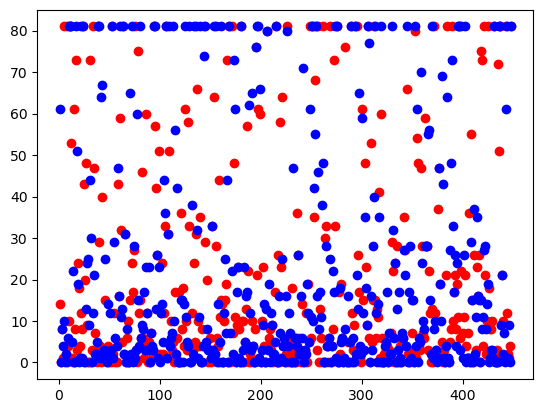

In [43]:
plt.scatter(x,y_fruit_veg,color='red')
plt.scatter(x,y_fruit_veg_test,color='blue')
plt.show()

In [44]:
joblib.dump(regressor_t, 'model_fav.joblib')

['model_fav.joblib']

#### NON VEG

In [45]:
regressor_t.fit(X_train, y_non_veg_train)
y_non_veg = regressor_t.predict(X_test)

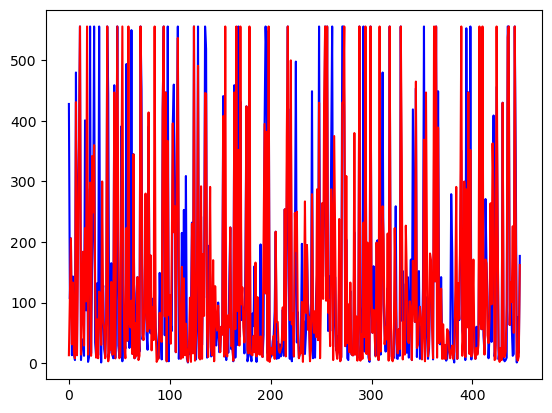

In [46]:
plt.plot(y_non_veg_test,color = 'blue')
plt.plot(y_non_veg, color='red')

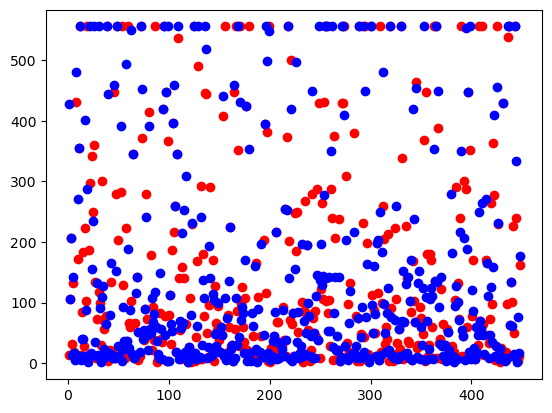

In [47]:
plt.scatter(x,y_non_veg,color='red')
plt.scatter(x,y_non_veg_test,color='blue')
plt.show()

In [48]:
joblib.dump(regressor_t, 'model_non_veg.joblib')

['model_non_veg.joblib']

#### GROCERIES

In [49]:
regressor_t.fit(X_train, y_groceries_train)
y_groceries = regressor_t.predict(X_test)

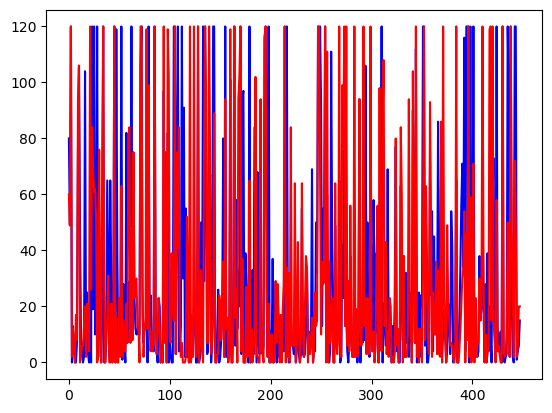

In [50]:
plt.plot(y_groceries_test,color = 'blue')
plt.plot(y_groceries, color='red')

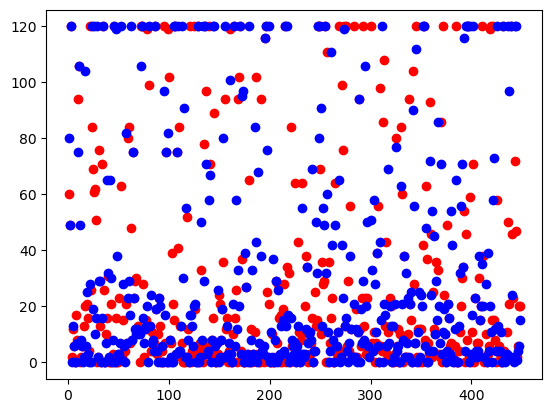

In [51]:
plt.scatter(x,y_groceries,color='red')
plt.scatter(x,y_groceries_test,color='blue')
plt.show()

In [52]:
joblib.dump(regressor_t, 'model_groceries.joblib')

['model_groceries.joblib']

#### SWEET

In [53]:
regressor_t.fit(X_train, y_sweet_train)
y_sweet = regressor_t.predict(X_test)

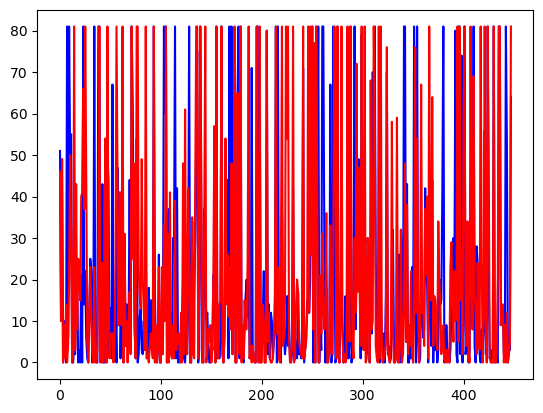

In [54]:
plt.plot(y_sweet_test,color = 'blue')
plt.plot(y_sweet, color='red')

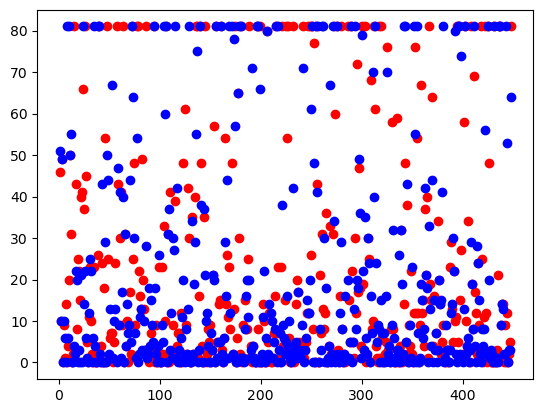

In [55]:
plt.scatter(x,y_sweet,color='red')
plt.scatter(x,y_sweet_test,color='blue')
plt.show()

In [56]:
joblib.dump(regressor_t, 'model_sweets.joblib')

['model_sweets.joblib']

#### SNACKS

In [57]:
regressor_t.fit(X_train, y_snacks_train)
y_snacks = regressor_t.predict(X_test)

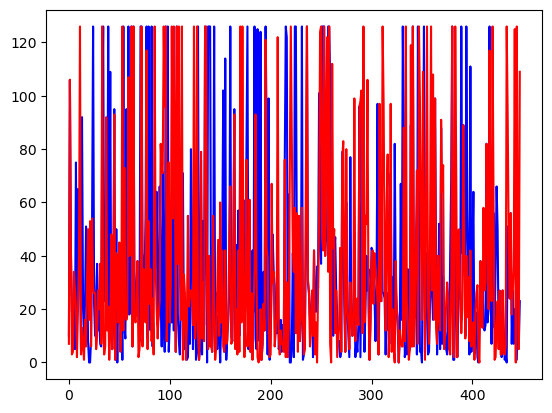

In [58]:
plt.plot(y_snacks_test,color = 'blue')
plt.plot(y_snacks, color='red')

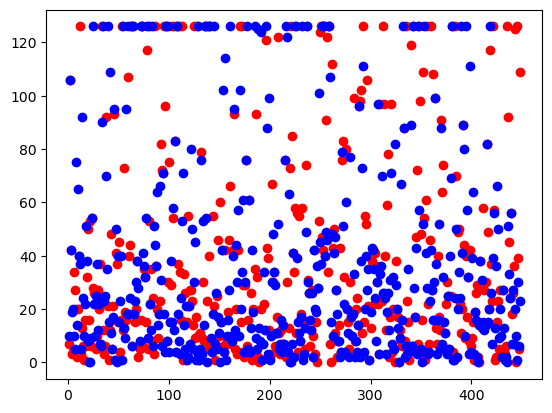

In [59]:
plt.scatter(x,y_snacks,color='red')
plt.scatter(x,y_snacks_test,color='blue')
plt.show()

In [60]:
joblib.dump(regressor_t, 'model_snacks.joblib')

['model_snacks.joblib']

#### WEB PURCHASE

In [61]:
regressor_t.fit(X_train, y_web_purchase_train)
y_web_purchase = regressor_t.predict(X_test)

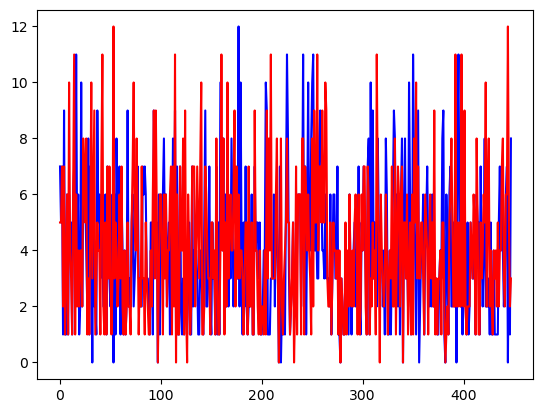

In [62]:
plt.plot(y_web_purchase_test,color = 'blue')
plt.plot(y_web_purchase, color='red')

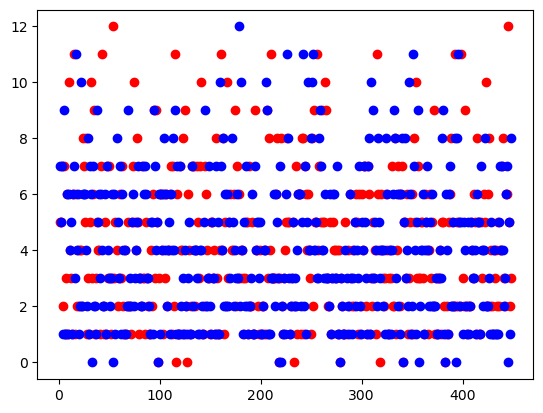

In [63]:
plt.scatter(x,y_web_purchase,color='red')
plt.scatter(x,y_web_purchase_test,color='blue')
plt.show()

In [64]:
joblib.dump(regressor_t, 'model_web_purchase.joblib')

['model_web_purchase.joblib']

#### CATALOGUE

In [65]:
regressor_t.fit(X_train, y_catalogue_train)
y_catalogue = regressor_t.predict(X_test)

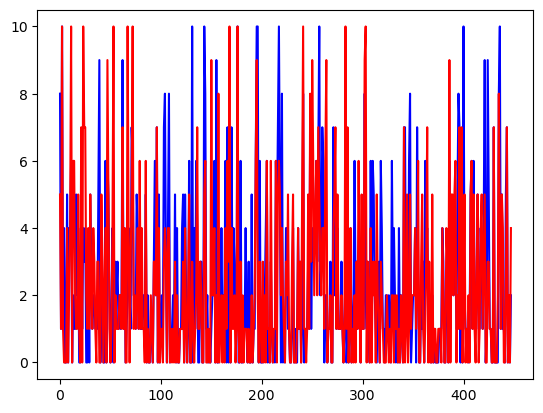

In [66]:
plt.plot(y_catalogue_test,color = 'blue')
plt.plot(y_catalogue, color='red')

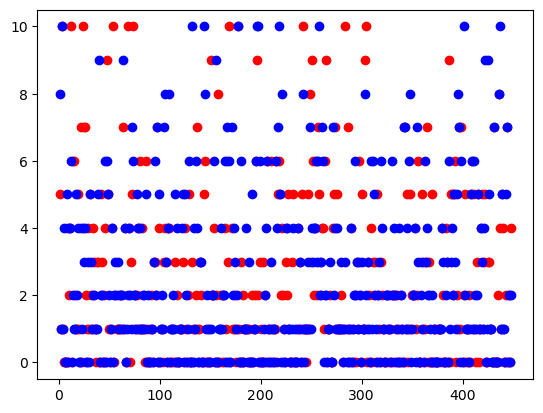

In [67]:
plt.scatter(x,y_catalogue,color='red')
plt.scatter(x,y_catalogue_test,color='blue')
plt.show()

In [68]:
joblib.dump(regressor_t, 'model_catalogue.joblib')

['model_catalogue.joblib']

#### STORE

In [69]:
regressor_t.fit(X_train, y_store_train)
y_store = regressor_t.predict(X_test)

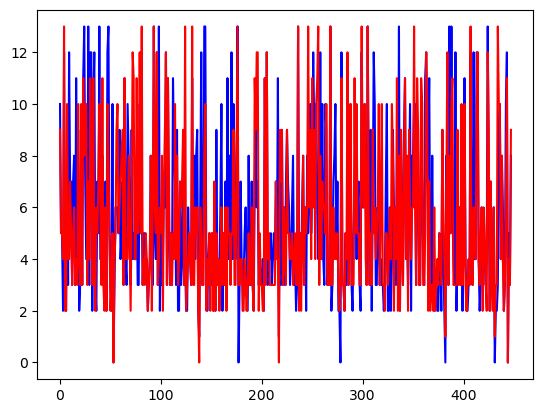

In [70]:
plt.plot(y_store_test,color = 'blue')
plt.plot(y_store, color='red')

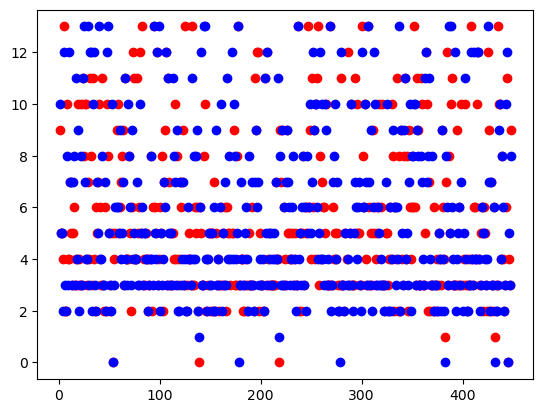

In [71]:
plt.scatter(x,y_store,color='red')
plt.scatter(x,y_store_test,color='blue')
plt.show()

In [72]:
joblib.dump(regressor_t, 'model_store.joblib')

['model_store.joblib']

#### WEB VISIT

In [73]:
regressor_t.fit(X_train, y_web_visit_train)
y_web_visit = regressor_t.predict(X_test)

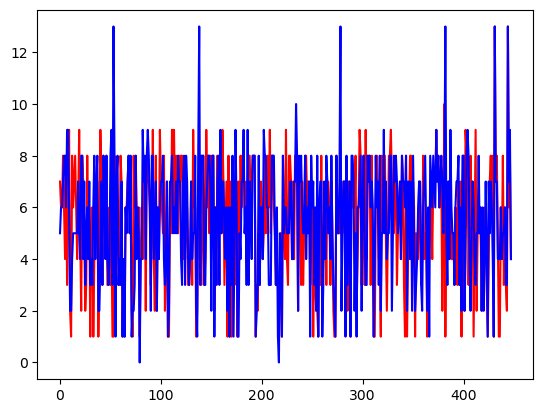

In [74]:
plt.plot(y_web_visit, color='red')
plt.plot(y_web_visit_test,color = 'blue')

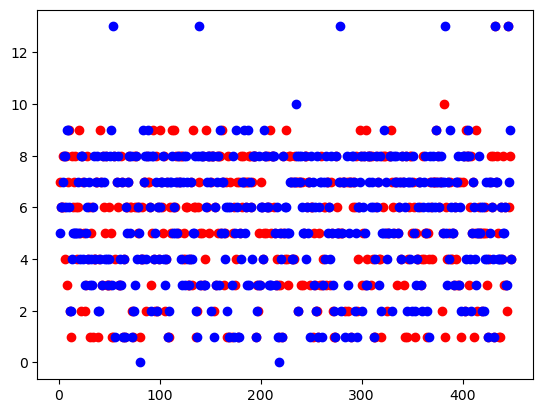

In [75]:
plt.scatter(x,y_web_visit,color='red')
plt.scatter(x,y_web_visit_test,color='blue')
plt.show()

In [76]:
joblib.dump(regressor_t, 'model_web_visit.joblib')

['model_web_visit.joblib']

#### ACCEPT CMP1

In [77]:
classifier.fit(X_train, y_accept_cmp1_train)
y_accept_cmp1 = classifier.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(y_accept_cmp1_test, y_accept_cmp1)
print(cm1)
accuracy_score(y_accept_cmp1_test, y_accept_cmp1)

[[418   1]
 [ 27   2]]


0.9375

In [79]:
joblib.dump(classifier, 'model_acmp1.joblib')

['model_acmp1.joblib']

#### ACCEPT CMP2

In [80]:
classifier.fit(X_train, y_accept_cmp2_train)
y_accept_cmp2 = classifier.predict(X_test)

In [81]:
cm2 = confusion_matrix(y_accept_cmp2_test, y_accept_cmp2)
print(cm2)
accuracy_score(y_accept_cmp2_test, y_accept_cmp2)

[[444   0]
 [  4   0]]


0.9910714285714286

In [82]:
joblib.dump(classifier, 'model_acmp2.joblib')

['model_acmp2.joblib']

## Important Observation

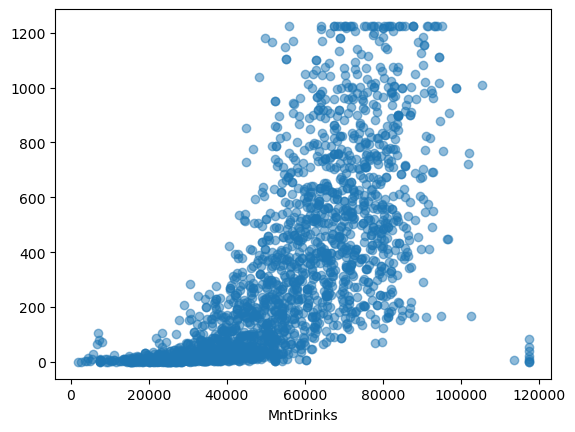

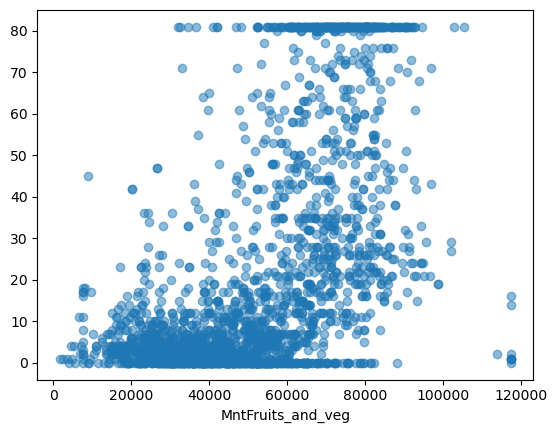

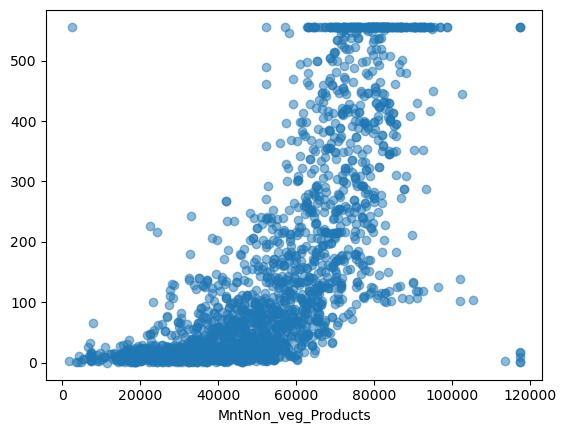

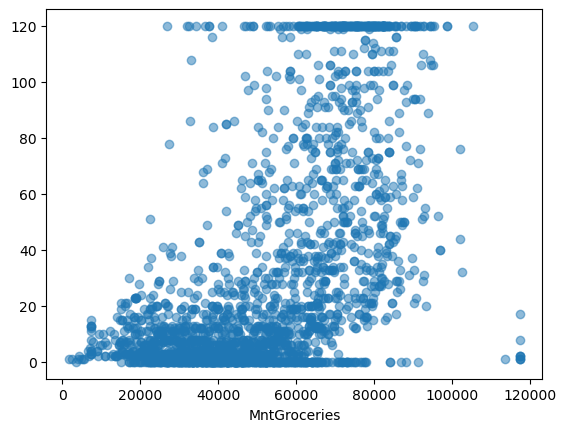

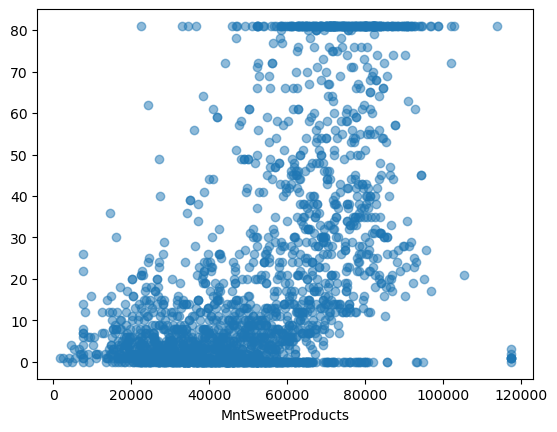

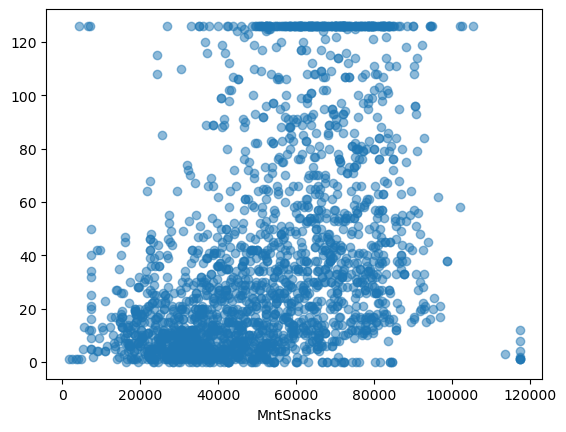

In [83]:
plt.scatter(data['Income'],data['MntDrinks'],alpha = .5)
plt.xlabel('MntDrinks')
plt.show()
plt.scatter(data['Income'],data['MntFruits_and_veg'],alpha = .5)
plt.xlabel('MntFruits_and_veg')
plt.show()
plt.scatter(data['Income'],data['MntNon_veg_Products'],alpha = .5)
plt.xlabel('MntNon_veg_Products')
plt.show()
plt.scatter(data['Income'],data['MntGroceries'],alpha = .5)
plt.xlabel('MntGroceries')
plt.show()
plt.scatter(data['Income'],data['MntSweetProducts'],alpha = .5)
plt.xlabel('MntSweetProducts')
plt.show()
plt.scatter(data['Income'],data['MntSnacks'],alpha = .5)
plt.xlabel('MntSnacks')
plt.show()

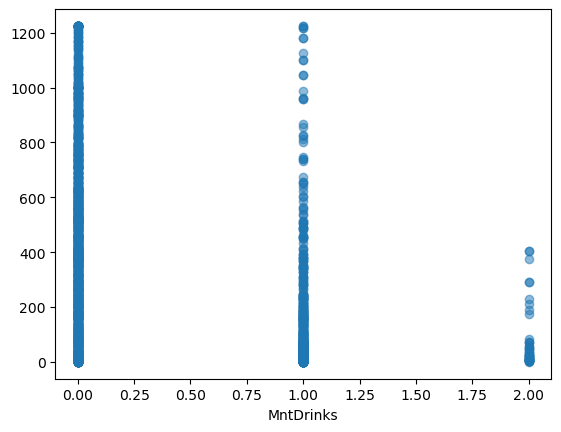

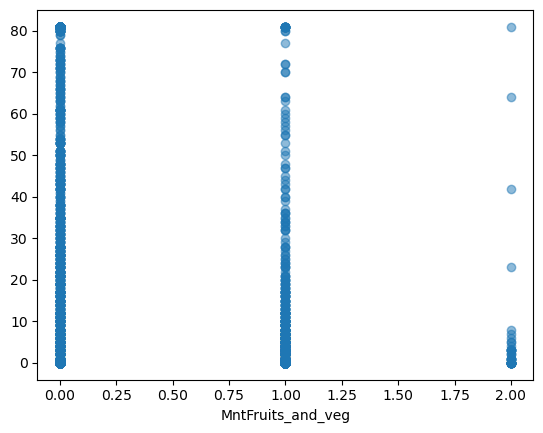

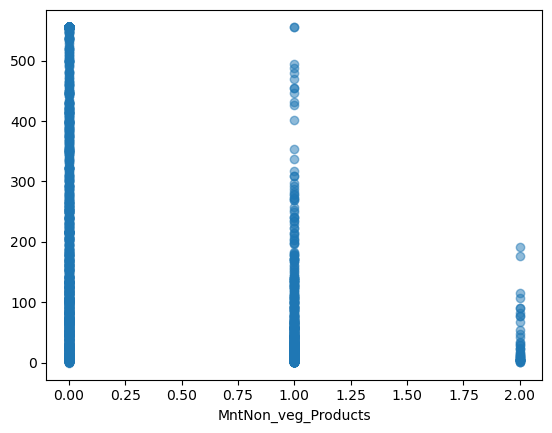

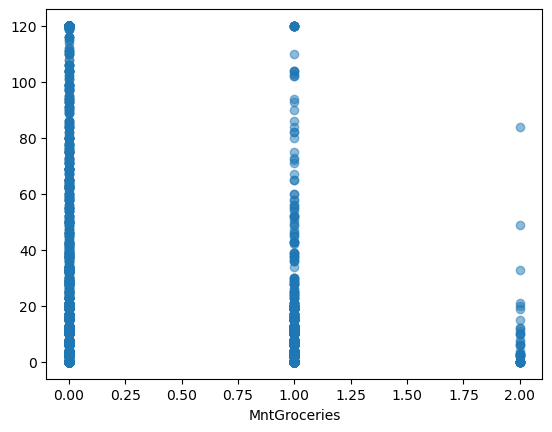

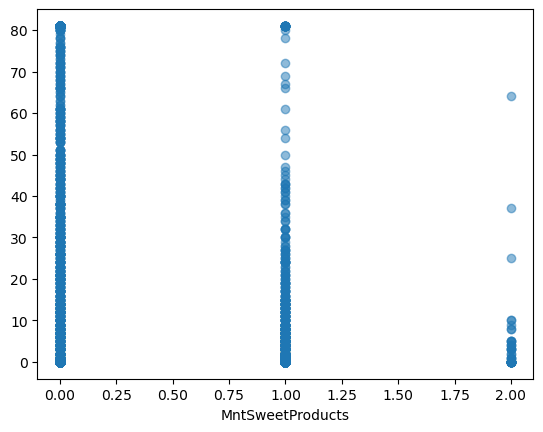

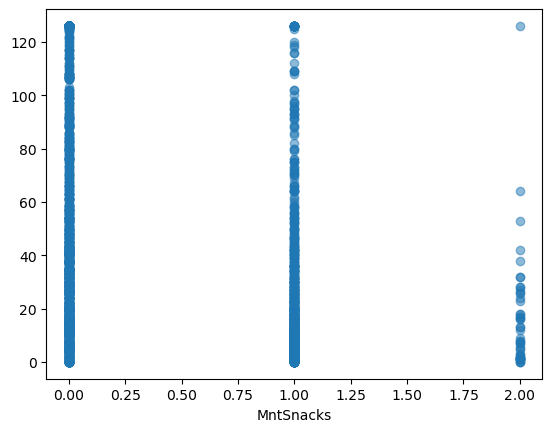

In [84]:
plt.scatter(data['Kidhome'],data['MntDrinks'],alpha = .5)
plt.xlabel('MntDrinks')
plt.show()
plt.scatter(data['Kidhome'],data['MntFruits_and_veg'],alpha = .5)
plt.xlabel('MntFruits_and_veg')
plt.show()
plt.scatter(data['Kidhome'],data['MntNon_veg_Products'],alpha = .5)
plt.xlabel('MntNon_veg_Products')
plt.show()
plt.scatter(data['Kidhome'],data['MntGroceries'],alpha = .5)
plt.xlabel('MntGroceries')
plt.show()
plt.scatter(data['Kidhome'],data['MntSweetProducts'],alpha = .5)
plt.xlabel('MntSweetProducts')
plt.show()
plt.scatter(data['Kidhome'],data['MntSnacks'],alpha = .5)
plt.xlabel('MntSnacks')
plt.show()

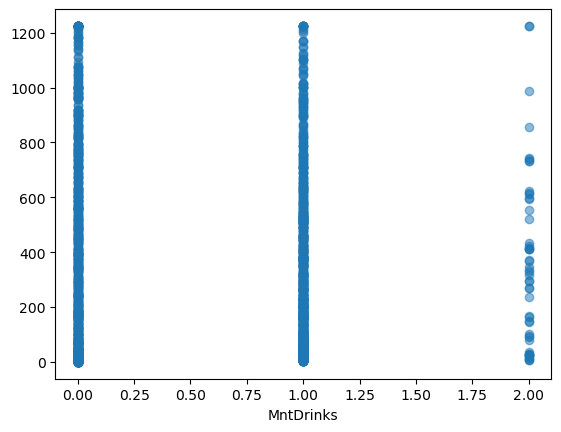

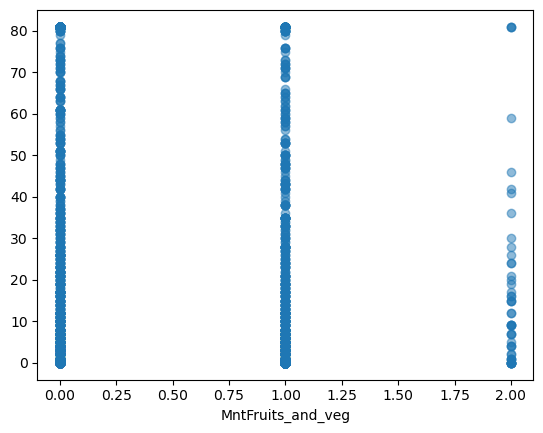

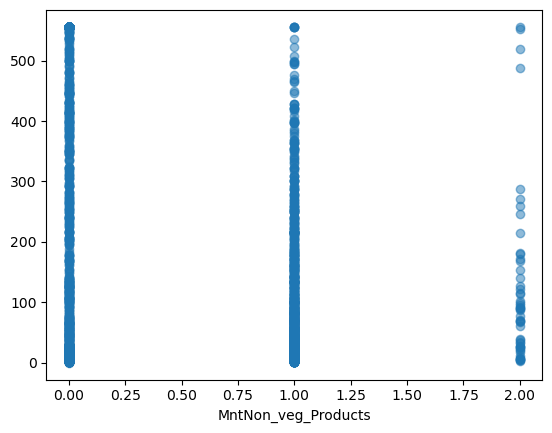

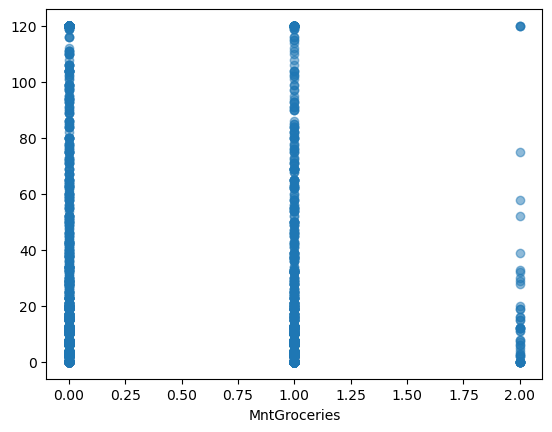

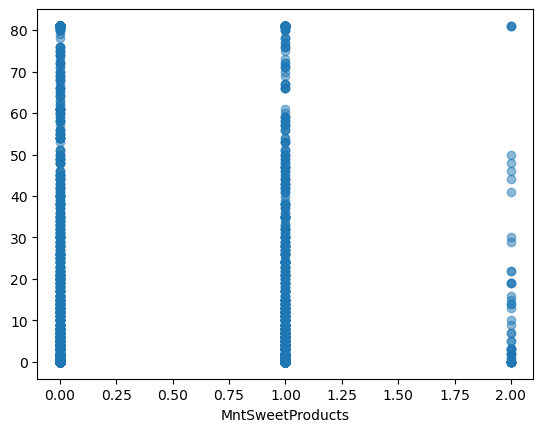

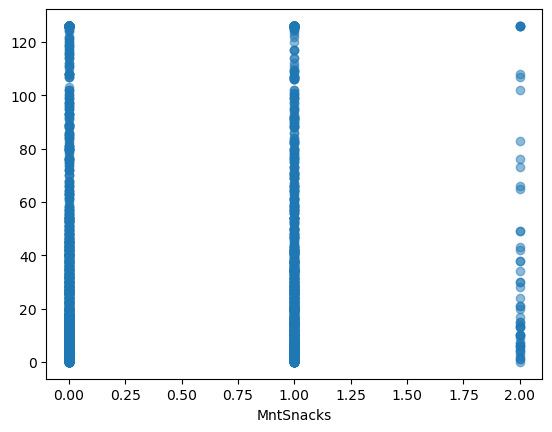

In [85]:
plt.scatter(data['Teenhome'],data['MntDrinks'],alpha = .5)
plt.xlabel('MntDrinks')
plt.show()
plt.scatter(data['Teenhome'],data['MntFruits_and_veg'],alpha = .5)
plt.xlabel('MntFruits_and_veg')
plt.show()
plt.scatter(data['Teenhome'],data['MntNon_veg_Products'],alpha = .5)
plt.xlabel('MntNon_veg_Products')
plt.show()
plt.scatter(data['Teenhome'],data['MntGroceries'],alpha = .5)
plt.xlabel('MntGroceries')
plt.show()
plt.scatter(data['Teenhome'],data['MntSweetProducts'],alpha = .5)
plt.xlabel('MntSweetProducts')
plt.show()
plt.scatter(data['Teenhome'],data['MntSnacks'],alpha = .5)
plt.xlabel('MntSnacks')
plt.show()